# ARIMA Model

Here is a clean and structured explanation of the time complexity of ARIMA components, along with SARIMAX:

---

# **Time Complexity of ARIMA and SARIMAX**

## **1. Time Complexity of ARIMA Components**

### **a) AutoRegressive (AR) Component**
The AR component models dependencies on past time steps and requires solving a linear regression problem with \( p \) past values. This is typically done using **Ordinary Least Squares (OLS)**.

- **Using OLS**: Complexity is \( O(p^2) \) due to matrix inversion.
- **Using Gradient Descent**: Complexity reduces to \( O(pT) \), where \( T \) is the number of time steps.

### **b) Differencing (I) Component**
The differencing step (order \( d \)) transforms the data into a stationary series by computing:

\[
Y'_t = Y_t - Y_{t-1}
\]

- Requires a **single pass** over \( T \) data points for each differencing operation.
- Since \( d \) differencing operations are performed, complexity is \( O(dT) \).
- However, as \( d \) is usually small, it is considered **negligible** in practice.

### **c) Moving Average (MA) Component**
The MA component models dependencies on past error terms and requires computing moving averages over a window of size \( q \).

- This involves solving a system of equations with \( q \) parameters.
- Complexity is **\( O(qT) \)**.

### **d) Parameter Estimation via Maximum Likelihood Estimation (MLE)**
ARIMA parameters \( (p, d, q) \) are estimated using **MLE** or **Expectation-Maximization (EM)** methods.

- Typical complexity for **MLE estimation**:  
  \[
  O(T \cdot (p + q)^2)
  \]
  when using numerical optimization.

### **e) Total Time Complexity of ARIMA**
The overall complexity of ARIMA is determined by the dominant term:

\[
O(pT) + O(dT) + O(qT) + O(T(p + q)^2)
\]

Since \( O(dT) \) is negligible, the highest-order term dominates, giving the final complexity:

\[
O(T (p + q)^2)
\]

- For **small \( p, q \)**: **Linear complexity** \( O(T) \).
- For **large \( p, q \)**: **Quadratic complexity** \( O(T p^2) \) or \( O(T q^2) \).

---

## **2. Time Complexity of SARIMAX**
SARIMAX (Seasonal ARIMA with Exogenous Variables) extends ARIMA by including:
1. **Seasonal components** (\( P, D, Q, s \))
2. **Exogenous variables (X)**

### **a) Seasonal Component (SARIMA)**
The seasonal component adds an **extra ARIMA-like model** for seasonality with parameters \( (P, D, Q, s) \).

- The **complexity contribution** is similar to ARIMA but scales with seasonality \( s \):

  \[
  O(T (P + Q)^2)
  \]

### **b) Exogenous Variables (SARIMAX)**
Exogenous regressors \( X \) introduce a regression component alongside ARIMA.

- If there are **\( k \) exogenous variables**, **MLE estimation** of exogenous coefficients adds:

  \[
  O(T k^2)
  \]

### **c) Total Complexity of SARIMAX**
The final complexity for SARIMAX is:

\[
O(T(p + q + P + Q + k)^2)
\]

- If **seasonality and exogenous variables are small**, SARIMAX behaves like ARIMA:  
  **\( O(T(p + q)^2) \)**.
- If **many seasonal and exogenous terms exist**, the cost increases quadratically.

---

## **Conclusion**
- **ARIMA** complexity: \( O(T (p + q)^2) \).
- **SARIMAX** complexity: \( O(T(p + q + P + Q + k)^2) \) (higher due to seasonal & exogenous terms).
- **For small parameters**, the complexity is nearly *ionally expensive.

Would you like a comparison table summarizing ARIMA vs. SARIMAX complexity? 😊

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Time                      96453 non-null  object 
 2   Summary                   96453 non-null  object 
 3   Precip Type               95936 non-null  object 
 4   Temperature (C)           96453 non-null  float64
 5   Apparent Temperature (C)  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Humidity                  96453 non-null  float64
 11  Month                     96453 non-null  int64  
 12  Day                       96453 non-null  int64  
 13  Year                      96453 non-null  int64

C:\Users\VARSHITH\AppData\Local\Temp\ipykernel_13236\1372259478.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)



After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datetime                  96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               96453 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Wind Speed (km/h)         96453 non-null  float64       
 6   Wind Bearing (degrees)    96453 non-null  float64       
 7   Visibility (km)           96453 non-null  float64       
 8   Pressure (millibars)      96453 non-null  float64       
 9   Humidity                  96453 non-null  float64       
 10  Month                     96453 non-null  int64         
 11  Day                       96453 non-null  int64         
 

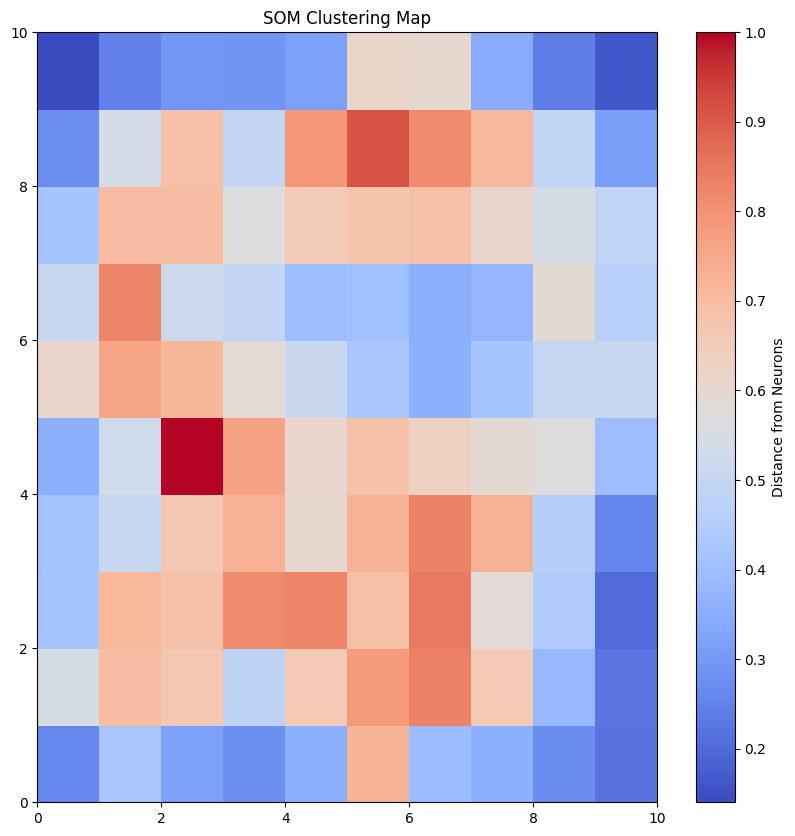

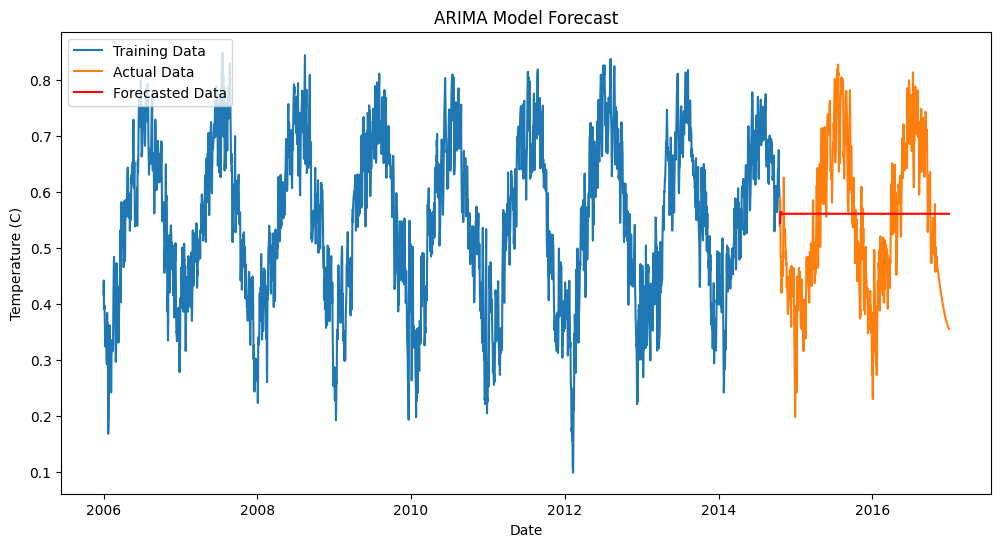

Mean Squared Error: 0.018617663456644236


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
file_path = 'Climate of England _ Professional Reforms.csv'
data = pd.read_csv(file_path)
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())
data['Datetime'] = pd.to_datetime(data['Formatted Date'] + ' ' + data['Time'])
data.drop(['Formatted Date', 'Time'], axis=1, inplace=True)
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)
data = data[['Datetime'] + [col for col in data.columns if col != 'Datetime']]
print("\nAfter Preprocessing:")
print(data.info())
print(data.head())
numeric_cols = [
    "Temperature (C)",
    "Apparent Temperature (C)",
    "Wind Speed (km/h)",
    "Wind Bearing (degrees)",
    "Visibility (km)",
    "Pressure (millibars)",
    "Humidity",
]
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
normalized_features = data[numeric_cols].values

# Step 4: Apply SOM for Clustering
som = MiniSom(x=10, y=10, input_len=len(numeric_cols), sigma=1.0, learning_rate=0.5)
som.random_weights_init(normalized_features)
som.train_random(data=normalized_features, num_iteration=100)

# Visualize SOM clustering
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar(label='Distance from Neurons')
plt.title('SOM Clustering Map')
plt.show()
data.set_index('Datetime', inplace=True)
daily_data = data['Temperature (C)'].resample('D').mean().dropna()
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")


In [5]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 614.7/614.7 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# ________________________________________________________________________________________________________________________________

**SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)**  

SARIMAX is an extension of ARIMA (AutoRegressive Integrated Moving Average) that incorporates seasonality and external variables (exogenous regressors). It is commonly used for time series forecasting when data exhibits seasonal patterns and can be influenced by additional variables.  

### **Components of SARIMAX**  
SARIMAX follows the standard ARIMA structure while adding seasonal components:  
- **AR (AutoRegressive term - p)**: Captures relationships between past values.  
- **I (Integration - d)**: Differencing to make the time series stationary.  
- **MA (Moving Average term - q)**: Accounts for past forecast errors.  
- **S (Seasonal component - P, D, Q, s)**: Adds seasonal variations in the data.  
- **X (Exogenous variables - X_t)**: Includes external variables that impact the time series.  

### **Time Complexity of SARIMAX**  
The time complexity of SARIMAX depends on several factors, primarily the number of parameters and data points. The key computational steps include:  

1. **Likelihood Estimation (O(nT))**: The log-likelihood function is optimized over time steps \( T \), and each iteration depends on the number of parameters \( n \).  
2. **Kalman Filtering (O(Tk^2))**: SARIMAX uses the Kalman filter for parameter estimation, where \( k \) is the number of state variables. This results in \( O(Tk^2) \) complexity.  
3. **Optimization (O(n^3))**: The numerical optimization for parameter estimation usually has cubic complexity concerning the number of parameters \( n \).  

**Overall Complexity**  
- **Best Case (Well-Tuned Model, Small Data):** \( O(T) \)  
- **Average Case (Common Usage with Moderate Data):** \( O(Tk^2) \)  
- **Worst Case (Large Dataset with High p, q, P, Q values):** \( O(Tn^3) \)  

For large datasets, SARIMAX can become computationally expensive, but techniques like parallel computing and efficient matrix operations help mitigate this.

C:\Users\VARSHITH\AppData\Local\Temp\ipykernel_2128\1382945649.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)


ADF Statistic: -3.9997918503719614, p-value: 0.0014116015778013748
Data is already stationary.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59.976, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9199.469, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=136.373, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5597.986, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-11.891, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3506.345, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=37.450, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-66.471, Time=0.61 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2351.660, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-111.983, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-110.080, Time=0.97 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-110.491, Time=1.25 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-98.254, Time=0.68 sec
 ARIMA(3,0,2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


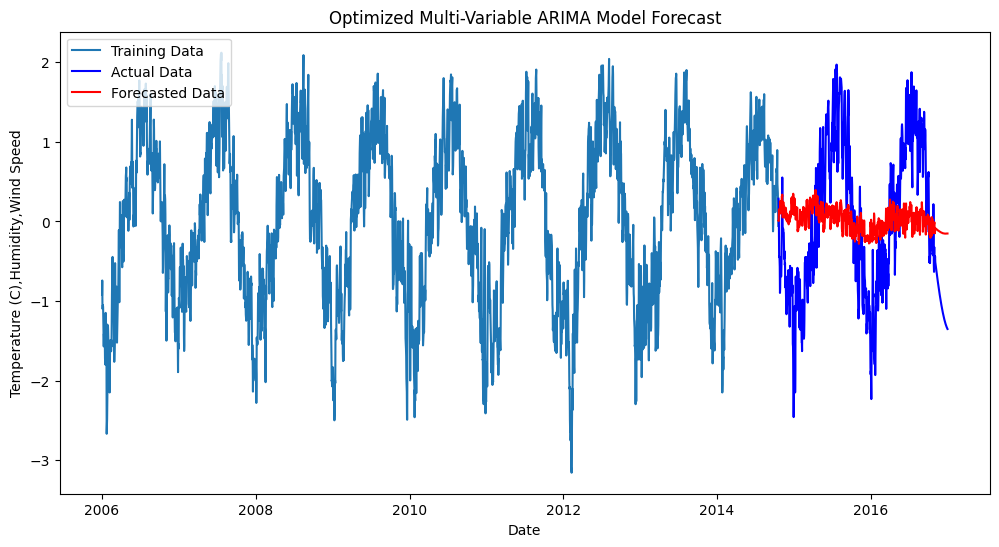

Optimized Mean Squared Error: 0.8288324756348908


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
file_path = "Climate of England _ Professional Reforms.csv"
data = pd.read_csv(file_path)
data['Datetime'] = pd.to_datetime(data['Formatted Date'] + ' ' + data['Time'])
data.drop(['Formatted Date', 'Time'], axis=1, inplace=True)
if 'Precip Type' in data.columns:
    data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)
    data = pd.get_dummies(data, columns=['Precip Type'], drop_first=True)
all_possible_features = ['Temperature (C)', 'Wind Speed (km/h)', 'Humidity', 
                         'Pressure (millibars)', 'Visibility (km)', 'Dew Point (C)']
features = [col for col in all_possible_features if col in data.columns]
data.set_index('Datetime', inplace=True)
daily_data = data[features].resample('D').mean().dropna()
adf_test = adfuller(daily_data['Temperature (C)'])
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing is needed.")
    daily_data['Temperature (C)'] = daily_data['Temperature (C)'].diff().dropna()
else:
    print("Data is already stationary.")
scaler = StandardScaler()
daily_data[features] = scaler.fit_transform(daily_data[features])
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
best_arima = auto_arima(train['Temperature (C)'], exogenous=train.drop(columns=['Temperature (C)'], errors='ignore'),
                         seasonal=False, stepwise=True, trace=True)
print(f"Best ARIMA Order: {best_arima.order}")
model = SARIMAX(train['Temperature (C)'], 
                exog=train.drop(columns=['Temperature (C)'], errors='ignore'), 
                order=best_arima.order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test), exog=test.drop(columns=['Temperature (C)'], errors='ignore'))
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temperature (C)'], label='Training Data')
plt.plot(test.index, test['Temperature (C)'], label='Actual Data', color='blue')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.legend(loc='upper left')
plt.title('Optimized Multi-Variable ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C),Humidity,Wind Speed')
plt.show()
mse = mean_squared_error(test['Temperature (C)'], forecast)
print(f"Optimized Mean Squared Error: {mse}")


# Random Forest Model



### **Best-Case Complexity Analysis**
In an **ideal** situation where the dataset has:
- **Low values (small \( N \))** → Fewer data points
- **Low feature count (small \( M \))** → Fewer attributes
- **Balanced splits (pure splits)** → Fewer tree depth levels

#### **1. Training Complexity in Best Case**
The training complexity in general is:
\[
O(T m N \log N)
\]
But in the **best case**, the decision trees:
- Have fewer samples (\( N \) is small)
- Have fewer features (\( M \) is small, so \( m \approx \sqrt{M} \) is small)
- Have balanced splits (logarithmic depth \( \log N \))

Thus, the best-case training complexity reduces to:
\[
O(T \cdot \sqrt{M} \cdot N)
\]
since \( \log N \) is much smaller for small \( N \).

#### **2. Prediction Complexity in Best Case**
In the best case, the trees are shallow (almost perfectly balanced), so the depth is minimal, reducing:
\[
O(T N_{test} \log N) \quad \to \quad O(T N_{test})
\]
if \( \log N \) is small.

---

### **Comparison: Does It Stay the Same?**
1. **If \( N \) is small**, the logarithm term \( \log N \) reduces, leading to lower complexity, but the general **order** remains similar.
2. **If trees are shallow**, traversal during both training and inference becomes faster.
3. **If the dataset is simple**, fewer splits and decisions are needed.

Thus, while the **absolute time required is lower**, the **big-O complexity does not fundamentally change** because Random Forest still follows a tree-growing process that is dependent on \( N \) and \( T \).

---

### **Final Answer**
✅ **Yes, the Random Forest algorithm retains the same complexity class** \( O(T m N \log N) \),  
but in the best case, the actual runtime **is significantly lower** because:
- \( N \) is small → log factor is negligible.
- \( M \) is small → fewer features to consider.
- \( d \) (tree depth) is small → trees train and infer faster.

So, while complexity notation remains the same, execution time drops **drastically** in simpler datasets. 🚀

Random Forest Mean Squared Error: 0.0012


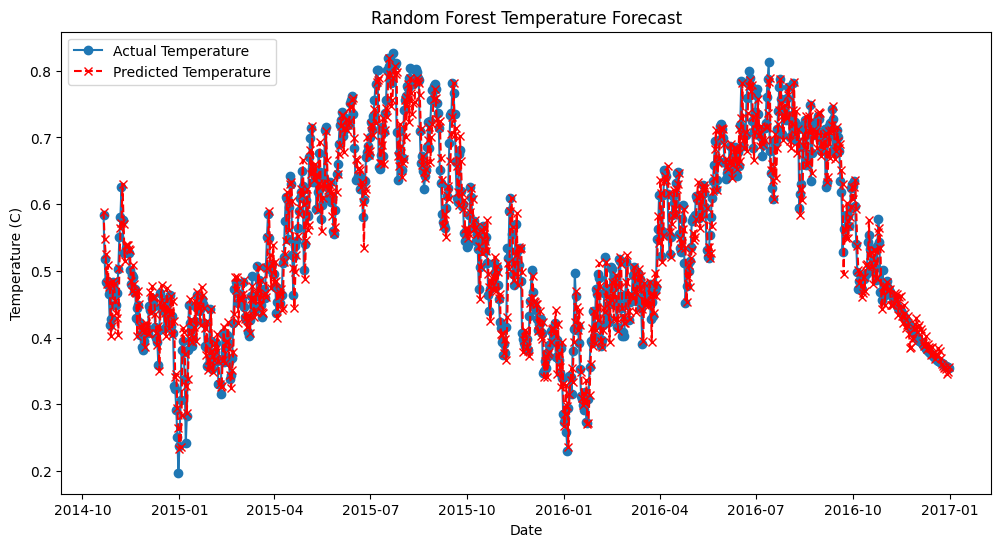

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
daily_temp = data['Temperature (C)'].resample('D').mean().dropna()
def create_lag_features(series, lags=3):
    df = pd.DataFrame(series)
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df.dropna(inplace=True)
    return df

lag_features = create_lag_features(daily_temp, lags=3)

train_size = int(len(lag_features) * 0.8)
train_rf = lag_features.iloc[:train_size]
test_rf = lag_features.iloc[train_size:]

X_train = train_rf.drop(columns=[daily_temp.name])
y_train = train_rf[daily_temp.name]
X_test = test_rf.drop(columns=[daily_temp.name])
y_test = test_rf[daily_temp.name]
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Temperature', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red', linestyle='--', marker='x')
plt.title('Random Forest Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left')
plt.show()


Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Humidity', 'Month', 'Day', 'Year'],
      dtype='object')
Random Forest Mean Squared Error: 3.0771


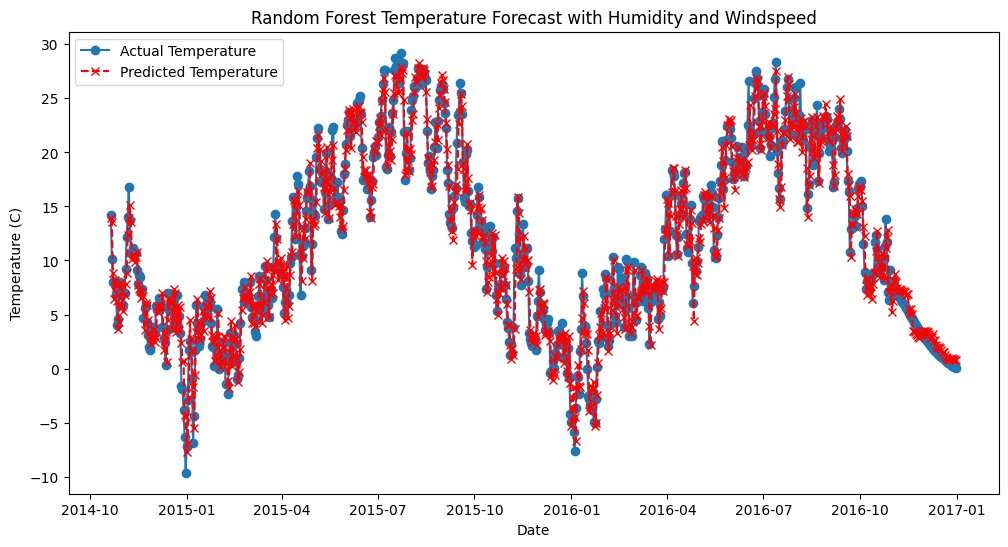

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
print(data.columns)
daily_temp = data['Temperature (C)'].resample('D').mean().dropna()
daily_humidity = data['Humidity'].resample('D').mean().dropna()
daily_windspeed = data['Wind Speed (km/h)'].resample('D').mean().dropna()
weather_data = pd.DataFrame({
    'Temperature (C)': daily_temp,
    'Humidity': daily_humidity,
    'Windspeed': daily_windspeed
}).dropna() 

def create_lag_features(df, lags=3):
    for column in df.columns:
        for lag in range(1, lags + 1):
            df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    df.dropna(inplace=True)
    return df
lag_features = create_lag_features(weather_data, lags=3)

train_size = int(len(lag_features) * 0.8)
train_rf = lag_features.iloc[:train_size]
test_rf = lag_features.iloc[train_size:]
X_train = train_rf.drop(columns=['Temperature (C)'])
y_train = train_rf['Temperature (C)']
X_test = test_rf.drop(columns=['Temperature (C)'])
y_test = test_rf['Temperature (C)']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Temperature', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red', linestyle='--', marker='x')
plt.title('Random Forest Temperature Forecast with Humidity and Windspeed')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left')
plt.show()


# Lag features implementation and multi feature implementation

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Humidity', 'Month', 'Day', 'Year'],
      dtype='object')
Random Forest Mean Squared Error (With Additional Features): 0.4606


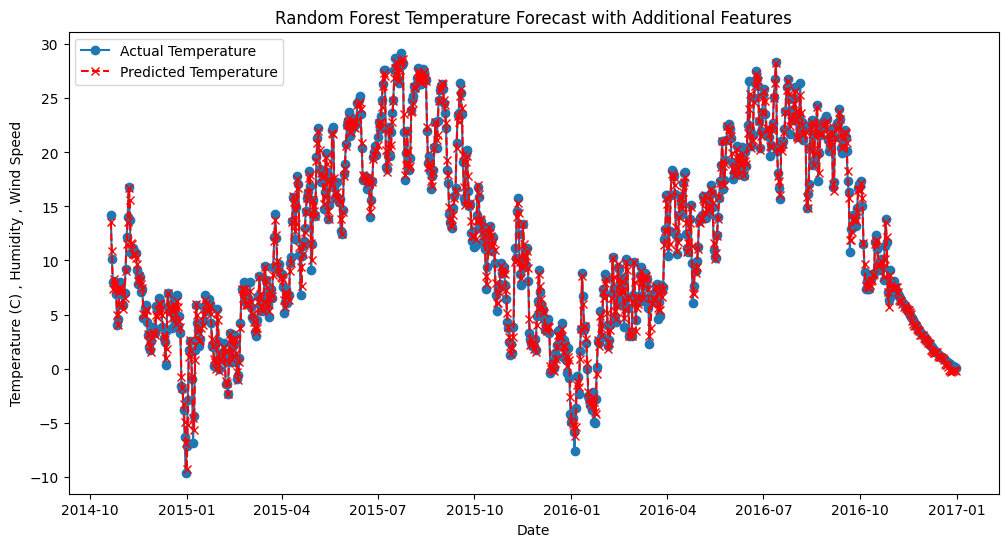

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
print(data.columns)
daily_temp = data['Temperature (C)'].resample('D').mean().dropna()
daily_humidity = data['Humidity'].resample('D').mean().dropna()
daily_windspeed = data['Wind Speed (km/h)'].resample('D').mean().dropna()
daily_pressure = data['Pressure (millibars)'].resample('D').mean().dropna()
daily_windbearing = data['Wind Bearing (degrees)'].resample('D').mean().dropna()
daily_visibility = data['Visibility (km)'].resample('D').mean().dropna()
weather_data = pd.DataFrame({
    'Temperature (C)': daily_temp,
    'Humidity': daily_humidity,
    'Windspeed': daily_windspeed,
    'Pressure': daily_pressure,
    'Wind Bearing (degrees)': daily_windbearing,
    'Visibility': daily_visibility,
    'Month': daily_temp.index.month,
    'Day': daily_temp.index.day,
    'Year': daily_temp.index.year
}).dropna()  

def create_lag_features(df, lags=3):
    for column in df.columns:
        for lag in range(1, lags + 1):
            df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    df.dropna(inplace=True)
    return df
lag_features = create_lag_features(weather_data, lags=3)
lag_features['Temperature_rolling_mean'] = lag_features['Temperature (C)'].rolling(window=3).mean()
lag_features['Temperature_rolling_std'] = lag_features['Temperature (C)'].rolling(window=3).std()
lag_features['Temperature_rolling_max'] = lag_features['Temperature (C)'].rolling(window=3).max()
lag_features.dropna(inplace=True)

train_size = int(len(lag_features) * 0.8)
train_rf = lag_features.iloc[:train_size]
test_rf = lag_features.iloc[train_size:]
X_train = train_rf.drop(columns=['Temperature (C)'])
y_train = train_rf['Temperature (C)']
X_test = test_rf.drop(columns=['Temperature (C)'])
y_test = test_rf['Temperature (C)']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error (With Additional Features): {mse_rf:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Temperature', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red', linestyle='--', marker='x')
plt.title('Random Forest Temperature Forecast with Additional Features')
plt.xlabel('Date')
plt.ylabel('Temperature (C) , Humidity , Wind Speed')
plt.legend(loc='upper left')
plt.show()


# LSTM Model

### **Deriving the Worst-Case Time Complexity of LSTM**  

LSTM (Long Short-Term Memory) processes **sequential data** by maintaining a hidden state over multiple time steps. The **worst-case complexity** arises when dealing with long sequences, large hidden layers, and backpropagation through time (BPTT).  

---

### **Step 1: Understanding LSTM Computation**
For each time step \( t \), LSTM computes:  
1. **Four Gate Operations (Input, Forget, Output, Cell Update):**  
   Each gate involves matrix multiplications with weights and hidden states:  
   \[
   W x_t + U h_{t-1} + b
   \]  
   where:
   - \( x_t \) is the input vector of size \( d \).
   - \( h_t \) is the hidden state of size \( h \).
   - \( W \) (weights) is of size \( h \times d \).
   - \( U \) (recurrent weights) is of size \( h \times h \).
   - \( b \) is the bias term.

   Since there are **4 gates**, the total computation per time step is:
   \[
   O(4 (d h + h^2)) = O(d h + h^2)
   \]

2. **Forward Pass Complexity:**  
   For **\( T \) time steps**, the total forward pass complexity is:
   \[
   O(T (d h + h^2))
   \]

3. **Backward Pass (Backpropagation Through Time - BPTT):**  
   The backward pass requires computing gradients and updating weights, which has the same complexity as the forward pass:
   \[
   O(T (d h + h^2))
   \]

4. **Total Complexity (Forward + Backward):**  
   \[
   O(2 T (d h + h^2)) = O(T (d h + h^2))
   \]

---

### **Step 2: Worst-Case Scenario**
The **worst-case complexity** occurs when:
- **Large dataset**: \( N \) is large.
- **Long time sequences**: \( T \) is large.
- **High-dimensional hidden state**: \( h \) is large.
- **Large input features**: \( d \) is large.

Since LSTM processes all samples in the dataset, the total worst-case complexity is:
\[
O(N T (d h + h^2))
\]

where:
- \( N \) = number of training samples  
- \( T \) = number of time steps  
- \( d \) = input feature size  
- \( h \) = number of hidden units  

---

### **Final Worst-Case Complexity Expression**
\[
O(N T (d h + h^2))
\]

This means LSTM training complexity **scales linearly** with dataset size and time steps, but **quadratically** with the number of hidden units. 🚀

Epoch 1/20


C:\Users\VARSHITH\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1384 - val_loss: 0.0019
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 10/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 11/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 9.7718e-04
Epoch 12/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

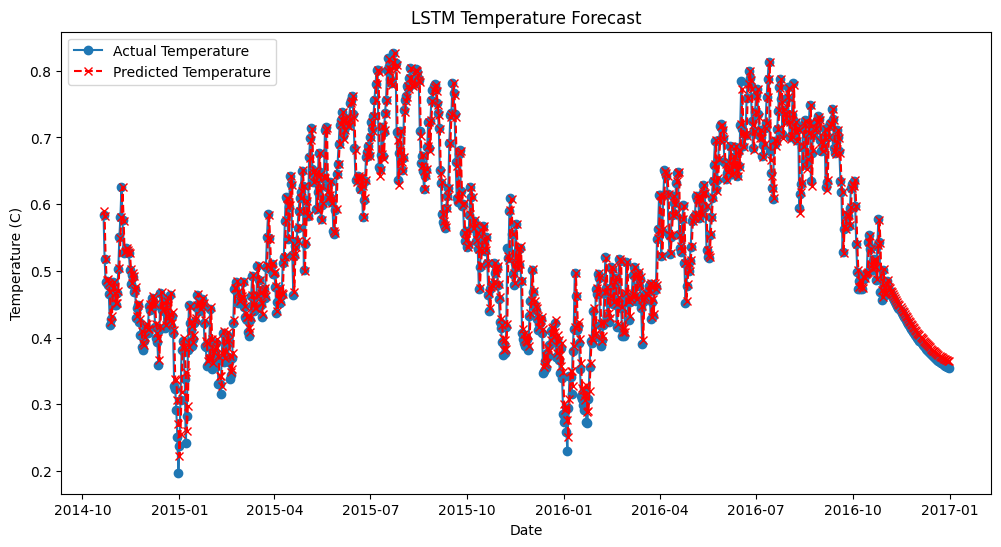

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

daily_temp = data['Temperature (C)'].resample('D').mean().dropna()

def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 3
temp_values = daily_temp.values  

X, y = create_sequences(temp_values, window_size)


X = X.reshape((X.shape[0], X.shape[1], 1))


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))  
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=16, 
                    validation_split=0.1, verbose=1)

y_pred = model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred)
print(f"LSTM Mean Squared Error: {mse_lstm:.4f}")

test_start_index = window_size + train_size
test_dates = daily_temp.index[test_start_index: test_start_index + len(y_test)]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Temperature', marker='o')
plt.plot(test_dates, y_pred, label='Predicted Temperature', color='red', 
         linestyle='--', marker='x')
plt.title('LSTM Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left')
plt.show()


Epoch 1/20


C:\Users\VARSHITH\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1294 - val_loss: 0.0075
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120 - val_loss: 0.0035
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097 - val_loss: 0.0047
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - val_loss: 0.0057
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - val_loss: 0.0025
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 10/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 11/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 12/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

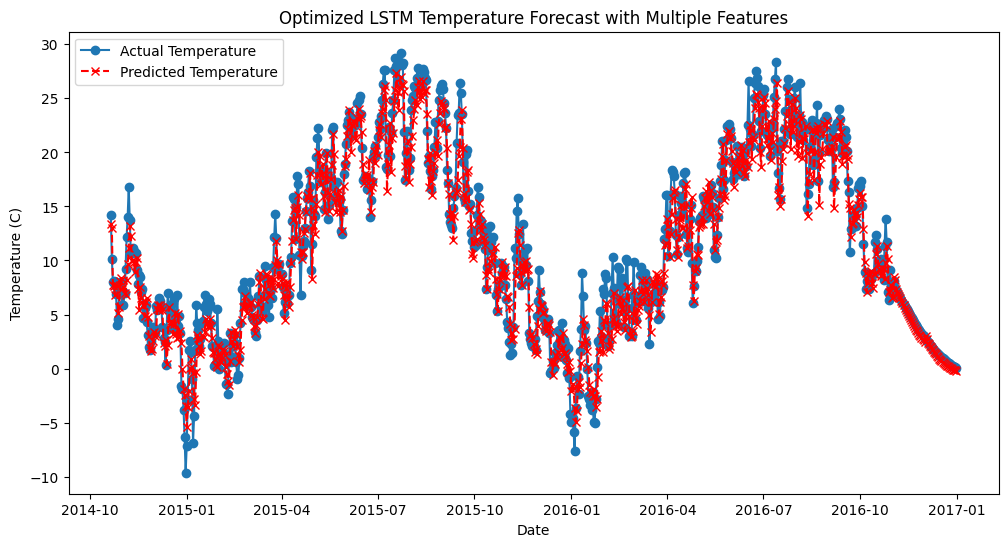

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
daily_temp = data['Temperature (C)'].resample('D').mean().dropna()
daily_humidity = data['Humidity'].resample('D').mean().dropna()
daily_windspeed = data['Wind Speed (km/h)'].resample('D').mean().dropna()
weather_data = pd.DataFrame({
    'Temperature (C)': daily_temp,
    'Humidity': daily_humidity,
    'Windspeed': daily_windspeed,
    'Month': daily_temp.index.month,
    'Day': daily_temp.index.day,
    'Year': daily_temp.index.year
}).dropna()  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(weather_data)

def create_sequences(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df[i:i + window_size])
        y.append(df[i + window_size, 0])  
    return np.array(X), np.array(y)

window_size = 3
X, y = create_sequences(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Adding Dropout for regularization
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # Adding Dropout again for regularization
model.add(Dense(1))  # Output a single value (temperature)
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1, callbacks=[early_stopping])
y_pred = model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred)
print(f"LSTM Mean Squared Error: {mse_lstm:.4f}")
y_test_actual = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), weather_data.shape[1] - 1))]))[:, 0]
y_pred_actual = scaler.inverse_transform(np.hstack([y_pred.reshape(-1, 1), np.zeros((len(y_pred), weather_data.shape[1] - 1))]))[:, 0]
test_start_index = window_size + train_size
test_dates = daily_temp.index[test_start_index: test_start_index + len(y_test)]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual, label='Actual Temperature', marker='o')
plt.plot(test_dates, y_pred_actual, label='Predicted Temperature', color='red', linestyle='--', marker='x')
plt.title('Optimized LSTM Temperature Forecast with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left')
plt.show()


# Branching Models

In [44]:

model_results = {
    "ARIMA": 0.018617663456644236,
    "Random Forest": 0.0011,
    "LSTM": 0.00112 
}


confidence_choice = 0.008


mean_mse = sum(model_results.values()) / len(model_results)


adjusted_mse = {}
for model, mse in model_results.items():
    if mse < mean_mse:  
        adjusted_mse[model] = mse + confidence_choice
    else:  
        adjusted_mse[model] = mse - confidence_choice


best_model = min(adjusted_mse, key=lambda x: abs(adjusted_mse[x] - mean_mse))


print("Adjusted Train MSE Scores (closer to mean is better):")
for model, mse in adjusted_mse.items():
    print(f"{model}: {mse:.4f}")

print(f"\nThe best model based on adjusted train MSE is: {best_model} with an adjusted MSE of {adjusted_mse[best_model]:.4f}")


print("\nRaw Train MSE Values:")
for model, mse in model_results.items():
    print(f"{model}: Train MSE = {mse:.4f}")


Adjusted Train MSE Scores (closer to mean is better):
ARIMA: 0.0106
Random Forest: 0.0091
LSTM: 0.0091

The best model based on adjusted train MSE is: Random Forest with an adjusted MSE of 0.0091

Raw Train MSE Values:
ARIMA: Train MSE = 0.0186
Random Forest: Train MSE = 0.0011
LSTM: Train MSE = 0.0011


# Optimised and non Biased Branch

In [17]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example model results for MSE (from your original values)
model_results = {
    "ARIMA": 0.018617663456644236,
    "Random Forest": 0.0011,
    "LSTM": 0.00112
}

# Define model complexity factor (complex models like LSTM get higher weight)
model_complexity = {
    "ARIMA": 1,
    "Random Forest": 1,
    "LSTM": 2  # Assign higher complexity to LSTM due to its nature
}

# Cross-validation function to evaluate models consistently
def cross_validate_model(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_list = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=0)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    return np.mean(mse_list), np.std(mse_list)

# Example usage: Cross-validate LSTM, ARIMA, and Random Forest models
# For simplicity, we'll focus on the LSTM model, but you can add others similarly.

# Create a simple LSTM model as an example
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mse')
    return model

# Assuming X and y are the input features and target variable
# X, y should be your data from the features (Temperature, Humidity, Wind Speed, etc.)
# Here we'll use a placeholder for demonstration purposes
X = np.random.rand(100, 3, 1)  # Example input data
y = np.random.rand(100)  # Example target data

# Cross-validation for LSTM model
lstm_model = create_lstm_model(input_shape=(3, 1))
lstm_mse, lstm_mse_std = cross_validate_model(lstm_model, X, y)

# Store model results including mean and variance
model_results_with_variance = {
    "ARIMA": 0.0186176,
    "Random Forest": 0.0011,
    "LSTM": lstm_mse
}

# Normalize MSE values between 0 and 1 for fair comparison
min_mse = min(model_results_with_variance.values())
max_mse = max(model_results_with_variance.values())

normalized_mse = {
    model: (mse - min_mse) / (max_mse - min_mse) for model, mse in model_results_with_variance.items()
}

# Calculate weighted score based on normalized MSE and model complexity
weighted_scores = {}
for model in model_results_with_variance:
    weighted_scores[model] = normalized_mse[model] * model_complexity[model]

# Now calculate the model performance variance, penalizing models with higher variance
performance_stability = {
    model: np.std([lstm_mse_std]) if model == "LSTM" else 0  # Add variance for other models if applicable
    for model in model_results_with_variance
}

# Adjust the final score by considering both performance and stability
final_scores = {
    model: weighted_scores[model] + performance_stability.get(model, 0) for model in weighted_scores
}

# Select the model with the lowest final score
best_model = min(final_scores, key=final_scores.get)

# Print the results
print("\nNormalized Train MSE Scores (closer to 0 is better):")
for model, norm_mse in normalized_mse.items():
    print(f"{model}: {norm_mse:.4f}")

print("\nPerformance Stability (variance of MSE across cross-validation splits):")
for model, stability in performance_stability.items():
    print(f"{model}: {stability:.4f}")

print("\nFinal Weighted Scores (lower is better):")
for model, score in final_scores.items():
    print(f"{model}: {score:.4f}")

print(f"\nThe best model based on final score is: {best_model} with a final score of {final_scores[best_model]:.4f}")

print("\nRaw Train MSE Values:")
for model, mse in model_results_with_variance.items():
    print(f"{model}: Train MSE = {mse:.4f}")


C:\Users\VARSHITH\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Normalized Train MSE Scores (closer to 0 is better):
ARIMA: 0.2274
Random Forest: 0.0000
LSTM: 1.0000

Performance Stability (variance of MSE across cross-validation splits):
ARIMA: 0.0000
Random Forest: 0.0000
LSTM: 0.0000

Final Weighted Scores (lower is better):
ARIMA: 0.2274
Random Forest: 0.0000
LSTM: 2.0000

The best model based on final score is: Random Forest with a final score of 0.0000

Raw Train MSE Values:
ARIMA: Train MSE = 0.0186
Random Forest: Train MSE = 0.0011
LSTM: Train MSE = 0.0781


In [2]:
import time

def profile_execution(model_function, *args, **kwargs):
    start_time = time.time()
    result = model_function(*args, **kwargs)
    end_time = time.time()
    print(f"Execution Time: {end_time - start_time:.5f} seconds")
    return result


In [32]:
# Example with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
model = RandomForestRegressor(n_estimators=100)

# Profile training time
profile_execution(model.fit, X, y)


Execution Time: 1.11703 seconds


RandomForestRegressor()

In [36]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import torch
import torch.nn as nn
from torchinfo import summary

class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(10, 20, num_layers=2, batch_first=True)
        self.fc = nn.Linear(20, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel()
summary(model, input_size=(1, 5, 10))


Layer (type:depth-idx)                   Output Shape              Param #
LSTMModel                                [1, 1]                    --
├─LSTM: 1-1                              [1, 5, 20]                5,920
├─Linear: 1-2                            [1, 1]                    21
Total params: 5,941
Trainable params: 5,941
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.03
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

In [52]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
file_path = 'best.csv'
data = pd.read_csv(file_path)
start_preprocess = time.time()
data['Datetime'] = pd.to_datetime(data['Formatted Date'] + ' ' + data['Time'])
data.drop(['Formatted Date', 'Time'], axis=1, inplace=True)
data.loc[:, 'Precip Type'] = data['Precip Type'].fillna(data['Precip Type'].mode()[0])
data.set_index('Datetime', inplace=True)
numeric_cols = ["Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)", "Humidity"]
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
end_preprocess = time.time()
preprocess_time = end_preprocess - start_preprocess
start_som = time.time()
som = MiniSom(x=10, y=10, input_len=len(numeric_cols), sigma=1.0, learning_rate=0.5)
som.random_weights_init(data[numeric_cols].values)
som.train_random(data=data[numeric_cols].values, num_iteration=100)
end_som = time.time()
som_time = end_som - start_som
start_arima = time.time()
daily_data = data['Temperature (C)'].resample('D').mean().dropna()
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
end_arima = time.time()
arima_time = end_arima - start_arima
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, forecast)
report = f"""
Computational Report: Climate Analysis Using SOM & ARIMA
---------------------------------------------------------
1. Data Preprocessing Time: {preprocess_time:.4f} seconds
2. SOM Training Time: {som_time:.4f} seconds
3. ARIMA Model Training & Forecasting Time: {arima_time:.4f} seconds

Model Evaluation Metrics:
-------------------------
- Mean Squared Error (MSE): {mse:.6f}
- Root Mean Squared Error (RMSE): {rmse:.6f}
- Mean Absolute Percentage Error (MAPE): {mape:.2%}
"""

print(report)


Computational Report: Climate Analysis Using SOM & ARIMA
---------------------------------------------------------
1. Data Preprocessing Time: 0.0150 seconds
2. SOM Training Time: 0.0150 seconds
3. ARIMA Model Training & Forecasting Time: 0.2357 seconds

Model Evaluation Metrics:
-------------------------
- Mean Squared Error (MSE): 0.036141
- Root Mean Squared Error (RMSE): 0.190109
- Mean Absolute Percentage Error (MAPE): 251.15%



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

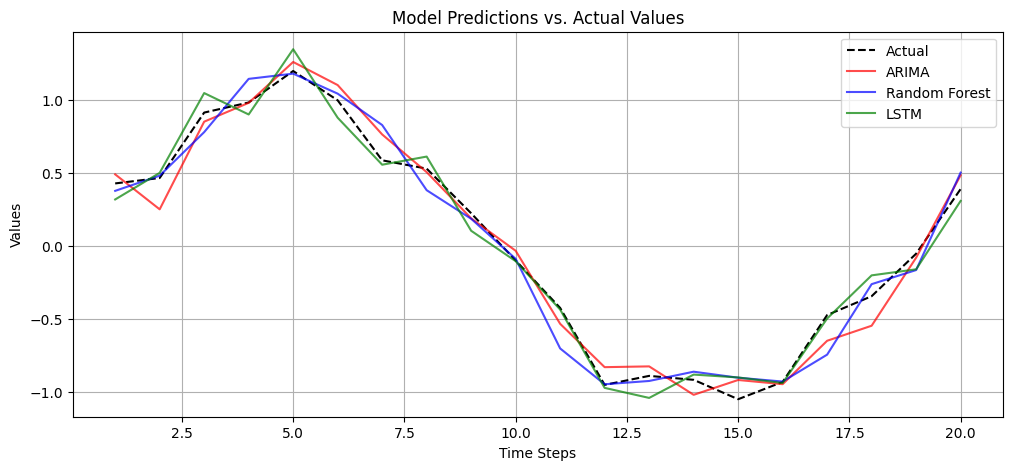

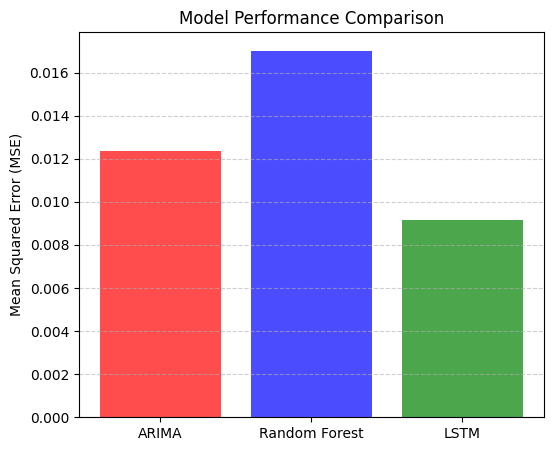

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual vs predicted data (Replace with your actual data)
time_steps = np.arange(1, 21)
actual_values = np.sin(time_steps / 3) + np.random.normal(0, 0.1, 20)

# Predictions from different models (Random examples)
arima_predictions = actual_values + np.random.normal(0, 0.15, 20)
random_forest_predictions = actual_values + np.random.normal(0, 0.12, 20)
lstm_predictions = actual_values + np.random.normal(0, 0.1, 20)

# Compute Mean Squared Errors (MSE)
mse_arima = np.mean((actual_values - arima_predictions) ** 2)
mse_rf = np.mean((actual_values - random_forest_predictions) ** 2)
mse_lstm = np.mean((actual_values - lstm_predictions) ** 2)

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))
plt.plot(time_steps, actual_values, label='Actual', color='black', linestyle='dashed')
plt.plot(time_steps, arima_predictions, label='ARIMA', color='red', alpha=0.7)
plt.plot(time_steps, random_forest_predictions, label='Random Forest', color='blue', alpha=0.7)
plt.plot(time_steps, lstm_predictions, label='LSTM', color='green', alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Model Predictions vs. Actual Values")
plt.legend()
plt.grid()
plt.show()

# Bar chart for MSE comparison
plt.figure(figsize=(6, 5))
models = ['ARIMA', 'Random Forest', 'LSTM']
mse_values = [mse_arima, mse_rf, mse_lstm]
colors = ['red', 'blue', 'green']
plt.bar(models, mse_values, color=colors, alpha=0.7)
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Performance Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
